# ccClub: Introduction to Machine Learning
---
## Lab 01: Introduction to Scikit-Learn

## Overview

- Input Data to Scikit-Learn
- Data Pre-processing with Scikit-Learn
- Feature Engineering with Scikit-Learn
- Split Data with Scikit-Learn
- Scikit-Learn Estimator API

## Installation

For details, please visit the [documentation](http://scikit-learn.org/stable/install.html).

>```python
pip install sklearn
```

# Part 1: Input Data to Scikit-Learn

The easiest way to understand how data work within Scikit-Learn is in terms of tables of data.

## Tables of Data

A basic table is a two-dimensional grid of data (like a spread sheet).

- Each row represents an **observation** or **sample**.
- Each column represents a **feature** or **attribute** or **variable**.
- Each entry of the table represents a single **value**.
- The number of rows is the total number of our samples in the dataset, which we refer to as `n_samples`.
- The number of columns is the total number of our features in the dataset, which we refer to as `n_features`.

![R for Data Science](img/tidy-1.png)

### Features Matrix

In sklearn, we usually store our table of data in a 2-dimensional NumPy array (matrix) or a Pandas DataFrame, called **features matrix**. We usually name this features matrix `X`. In general, this features matrix is 2-dimensional with shape `[n_sample, n_features]`. 

### Target Array

Target array is the labels or values that we want to predict. By convention, we usually call it `y`. It can contain continuous numerical values, or discrete classes/ labels. The target array is usually one-dimensional, with lenght `n_sample`.

Scikit-Learn also handles multiple targe values but we focus on the case of a one-dimensional target array here.

![Illustration of features matrix and target array](img/features_target.png)

## Example: Iris Dataset

For example, let's use the famous [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) to illustrate.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

### Table as Pandas DataFrame

Here, we load the Iris data directly form `seaborn`, a popular visulization package. The first four columns are features and the last column is the our target. To input data into sklearn, we will need to separate our data into features matrix and target array.

In [2]:
import seaborn as sns
sns.set()

# load iris dataset from seaborn 
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Visualize the data

Often, we will visualize our data to better understand it. Here, it seems like using `petal_length` and `petal_width` is a good start.

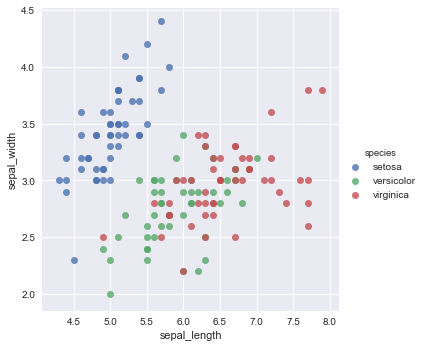

In [3]:
sns.lmplot(x='sepal_length', y='sepal_width', hue='species', data=iris, fit_reg=False);

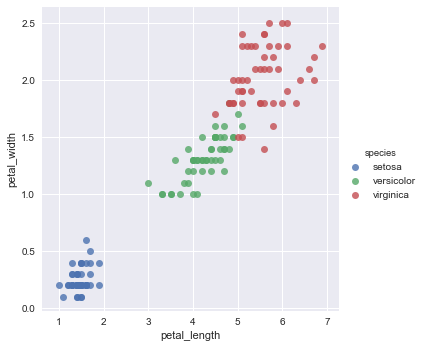

In [4]:
sns.lmplot(x='petal_length', y='petal_width', hue='species', data=iris, fit_reg=False);

### Toy Datasets from Scikit-Learn

Scikit-learn provides some small datasets for us to experiment with. We can load the toy data from `sklearn.datasets`. The dataset generation functions `load_iris()` return a tuple (X, y) consisting of a `[n_samples, n_features]` numpy array X (features matrix) and an array of length `n_samples` containing the targets y (target array).

**Other toy datasets**

| Scikit-learn function     | Data Type
| ------------------------- | -------------------------------------------------------------
| `load_boston([return_X_y])` | Load and return the boston house-prices dataset (regression).
| `load_iris([return_X_y])`	| Load and return the iris dataset (classification).
| `load_diabetes([return_X_y])` | Load and return the diabetes dataset (regression).
| `load_digits([n_class, return_X_y])` | Load and return the digits dataset (classification).
| `load_linnerud([return_X_y])` | Load and return the linnerud dataset (multivariate regression).
| `load_wine([return_X_y])` | Load and return the wine dataset (classification).
| `load_breast_cancer([return_X_y])` | Load and return the breast cancer wisconsin dataset (classification).


### Table as NumPy array

Here, we load the iris data from sklearn. Noted that features matrix is a 2-dimensional matrix but the target array is a 1-dimensional array.

In [5]:
# load iris dataset from sklearn
from sklearn.datasets import load_iris

features, target = load_iris(return_X_y=True)

print('shape of features matrix:', features.shape)
print('length of target array:', target.shape)

shape of features matrix: (150, 4)
length of target array: (150,)


In [6]:
print('features matrix\n', features[:10], '\n')
print('target array\n', target[:10])

features matrix
 [[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]] 

target array
 [0 0 0 0 0 0 0 0 0 0]


### Convert DataFrame or Series to NumPy array

In general, we will first load the data with Pandas to explore and manipulate the data first. After we are have our data ready, we will need to convert our Pandas DataFrame into NumPy array to work with sklearn library.

To covert Pandas DataFrame or Series into NumPy array, simple use `.values`.

In [7]:
# select features and target
features = iris.drop('species', axis=1)  # dataframe
target = iris['species']                 # series

display(features.head(), target.head())

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [8]:
# convert to NumPy array
X = features.values
y = target.values

print('features matrix:\n', X[:5], '\n')
print('target array:\n', y[:5])

features matrix:
 [[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]] 

target array:
 ['setosa' 'setosa' 'setosa' 'setosa' 'setosa']


# Part 2: Basics of the Scikit-Learn API

[Scikit-Learn](http://scikit-learn.org/stable/) is a popular machine learning library in Python. It has the following features:
 - Simple and efficient tools for data mining and data analysis
 - Accessible to everybody, and reusable in various contexts
 - Built on NumPy, SciPy, and matplotlib
 - Open source, commercially usable - BSD license
 
In Scikit-Learn, there are 6 major classes, which contain many general algorithms and modeling tools.
  - Classification
  - Regression
  - Clustering
  - Dimensionality Reduction
  - Model Selection
  - Preprocessing

## Scikit-Learn Workflow

In general, steps in using Scikit-Learn API are typically as follows:


>Step 1: Import the appropriate class of model from Scikit-Learn. (e.g. Regerssion, Preprocessing)

>Step 2: Set the model hyperparameters (if any) when instantiating the class.

>Step 3: Fit the model to the data by calling `fit()`.

>Step 4: Apply the model to (new) data:
- Predict labels for (new) data by calling `predict()`. 
- Transform the data based on some mapping (rules) by calling `transform()`.

You will soon start seeing this workflow in the following examples.

# Part 3: Basic Data Pre-processing & Feature Engineering

Very often, our raw data may not be suitable for building a model. We may encounter skewed data, outliers, missing data, etc. The `sklearn.preprocessing` package provides several common functions for us to transform our raw data into representative features. 

## Scaling Data: Standardization

Many algorithms, which we will disucss later in the course, assume that all features are centered around $0$ and have unit variance for all features. If a feature in the data have a much higher or smaller variance than others, it might dominate the model or be totally ignored. This makes the model unable to learn correctly as expected.

A common way to handle this problem is using standardization. It will transform your data to have $0$ mean and unit variance for all features by the formula below. We first subtract the mean from each feature then divide the values (mean is already subtracted) of each feature by its standard deviation.

$$
x_{new} = \frac{x - \mu}{\sigma}
$$

### `scale` function

To perform standardiztion, we use the function `scale` from `scikit-learn.preprocessing` package.

Standardization is just one way to re-scale data. scikit-learn also provides other scaling functions, you can find more information in the [documentation](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing).

In [9]:
from sklearn import preprocessing

print('original\n', X[:5])  # display features matrix from Iris data

X_scaled = preprocessing.scale(X)
print('\nstandardized\n', X_scaled[:5]) # display sacled data

original
 [[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]

standardized
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [10]:
# suppress scientific notation
np.set_printoptions(suppress=True)

# standardized data has zero mean and unit variance for all features
print('mean:', X_scaled.mean(axis=0))
print('\nvariance:', X_scaled.std(axis=0))

mean: [-0. -0. -0. -0.]

variance: [ 1.  1.  1.  1.]


## Imputation of Missing Data

Sometimes, we will encounter missing data, either encoded as blanks, NaNs or other placeholder values. scikit-learn assumes that all values have menning. We can dsicard the entire rows and/or columns with missing values. However, we may lose data that may be useful. A common strategy to deal with missing data is to impute the missing values, i.e. replace the missing values.

**Imputation means inferring the missing values from the known part of the data.** Some common simple choices to impute the missing value include using mean, moedian, or the mode. We can also use more sophisticated methods such as matrix completion or fitting another model to predict missing values. The sophisticated approaches are more application-specific, so we won't discuss them here.

### Check missing value in NumPy and Pandas

If you want to check whether there are any missing value (encoded as `NaN`) in your data, use `.any` and `.isnan` methods from NumPy or use `isna` or `isnull` from Pandas.

In [11]:
# create np array
missing_data = np.array([[0, np.nan, 2], 
                         [3, 4,      5], 
                         [6, 7,      np.nan]])

print(np.isnan(missing_data))   # check NaN for each value
print('\nIs there any missing value in the dataset:', np.any(np.isnan(missing_data)), '\n')

# create dataframe
missing_data_df = pd.DataFrame(missing_data)

print(missing_data_df.isnull())
print('\nCheck missing value for each column:')
print(missing_data_df.isnull().sum(axis=0))     # column sum

[[False  True False]
 [False False False]
 [False False  True]]

Is there any missing value in the dataset: True 

       0      1      2
0  False   True  False
1  False  False  False
2  False  False   True

Check missing value for each column:
0    0
1    1
2    1
dtype: int64


### `Imputer` class

In scikit-learn, the `Imputer` class provides some basic ways to impute the missing data. We can specifiy how do we want to impute the missing values as a parameters. The following demonstrates how to replace missing values, encoded as `np.nan`, using the mean value of the columns (axis 0) that contain the missing values.

In [12]:
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values='NaN', strategy='mean', axis=0) # create imputer
X_impute = imputer.fit_transform(missing_data)  # fit (i.e. calculate mean) and transform (i.e. impute) our data

# --- 
# fit_transform() can be decompose to two steps (fit and transform), the above is equivalent to the following:
# imputer.fit(missing_data)
# X_impute = imputer.transform(missing_data)
# ---

print(X_impute)

[[ 0.   5.5  2. ]
 [ 3.   4.   5. ]
 [ 6.   7.   3.5]]


## Transform Categorical Features

One common type of data is categorical data. Categorical data is non-numeric and the data does not imply any order. 

### Ordinal Encoding

When you frist see categorical data, you might be tempted to use a straightforward numeric value to represent them. This representation may be problematic. Scikit-Learn assumes that numerical values reflect algebraic quantities, meaning that $1 < 2$.

For example, if we have 3 brands (UNIQLO, H&M, Zara) and we encoding them as follow:

```python
{'UNIQLO': 0, 'H&M': 1, 'Zara': 2}
```

Then it would imply order or any algebraic quantities such as:
 - UNIQLO < H&M < Zara
 - Zara - UNIQUE = Zara
 - The average of 3 brands is: (UNIQLO + H&M + Zara) / 3 = H&M

These does not make much sense!

### One-Hot Encoding

One useful technique is to use one-hot encoding. It create extra columns for each category and use 1 or 0 to indicate the presense or absence of each category.

For our previous example, it would become:

```
    UNIQLO  H&M  Zara
      1      0    0
      0      1    0
      0      0    1
```

### `LabelEncoder()`

`LabelEncoder` function from skearn `preprocessing` package encodes labels with value between 0 and `n_classes-1`.

In [13]:
from sklearn.preprocessing import LabelEncoder

# create label encoder
categorical_data = ['UNIQLO', 'H&M', 'Zara']
encoder = LabelEncoder()
ordinal_data = encoder.fit_transform(categorical_data)  # fit (get all categories) and transform (ordinal encoding)
print('ordinal encoded:', ordinal_data)

# see each class
print('\nclasses:', encoder.classes_)  

# reverse ordinal encoding
print('\nreverse ordinal encoding:', encoder.inverse_transform(ordinal_data))

ordinal encoded: [1 0 2]

classes: ['H&M' 'UNIQLO' 'Zara']

reverse ordinal encoding: ['UNIQLO' 'H&M' 'Zara']


### `OneHotEncoder()`

Encode categorical integer features using a one-hot encoding.

The input to this transformer should be a matrix of integers, denoting the values taken on by categorical (discrete) features. It is assumed that input features take on values in the range `[0, n_values)`.

>The inpute should be in **matrix** form and should compose of **integers**.

>The output will be a **sparse matrix** by default. To return an array, set the parameter `spare=False`.

If you want to learn what is a spare matrix, see this [spare matrices video](https://www.youtube.com/watch?v=Lhef_jxzqCg).

In [14]:
from sklearn.preprocessing import OneHotEncoder

# convert array into matrix (column)
ordinal_data = ordinal_data.reshape(len(ordinal_data), 1)
print('ordinal data (matrix form):\n', ordinal_data)

# create label encoder
encoder = OneHotEncoder(sparse=False)
onehot_data = encoder.fit_transform(ordinal_data)
print('\nonehot encoded:\n', onehot_data)

ordinal data (matrix form):
 [[1]
 [0]
 [2]]

onehot encoded:
 [[ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]]


### Example : Mushroom Data

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be" for Poisonous Oak and Ivy.

[Download from UCI](https://archive.ics.uci.edu/ml/datasets/mushroom), 
[Download from Kaggle](https://www.kaggle.com/uciml/mushroom-classification)

In [15]:
mushrooms = pd.read_csv('data/mushrooms.csv')
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [16]:
# Encode into ordinal
mushrooms_ordinal = pd.DataFrame()

labelencoder=LabelEncoder()
for col in mushrooms.columns:
    mushrooms_ordinal[col] = labelencoder.fit_transform(mushrooms[col])
    
mushrooms_ordinal.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [17]:
# Encode into onehot
onehotencoder = OneHotEncoder(sparse=False)
mushrooms_onehot = onehotencoder.fit_transform(mushrooms_ordinal)
print(mushrooms_onehot.shape, '\n')
print(mushrooms_onehot)

(8124, 119) 

[[ 0.  1.  0. ...,  0.  1.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]]


# Part 4: Split Train/ Validation/ Test Set

## `train_test_split()`

To split arrays or matrices into random train and test subsets, use `train_test_split()` function from `model_selection` class. You can set parameters to specify how you want to split the data.

Some common parameters:
- test_size:
    - Proportion: should be float and between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split
    - Number: should be integer and represent the absolute number of test samples
    - Default: 0.25
- train_size:
    - Proportion
    - Number
    - Default: the complement of the test size
- random_state : int, the seed used by the random number generator

## Example: Split Mushrooms Data

In [18]:
mushrooms_ordinal.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


### Create Features Matrix `X` & Target Array `y`

First, we have to create a features matrix X and target array y from mushrooms data. Column "class" is the target that we want to predict, whether the mushroom is edible or poisonous.

In [19]:
X = mushrooms_ordinal.drop(['class'], axis=1)  # drop column 'class'
y = mushrooms_ordinal['class']

print('features matrix X')
display(X.head())

print('target array y')
display(y.head())

features matrix X


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


target array y


0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

### Convert Features Matrix to One-hot Encoding

Our features matrix is ordinal, which is not appropriate for our dataset so we have to convert the features matrix into onehot encoding. Noted that y is already onehot encoded (0 & 1) even though it is ordinal because there are only 2 classes here.

In [20]:
onehotencoder = OneHotEncoder(sparse=False)
X_onehot = onehotencoder.fit_transform(X)

print('[n_sample, n_features]:', X_onehot.shape)
print('\nfeatures matrix:')
print(X_onehot)

[n_sample, n_features]: (8124, 117)

features matrix:
[[ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


### Split Data: 80-20 Split

In [21]:
# train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_onehot, y, test_size=0.20, random_state=1)

print('training set X:', X_train.shape)
print('training set y:', y_train.shape)
print('testing set X:', X_test.shape)
print('testing set y:', y_test.shape)

training set X: (6499, 117)
training set y: (6499,)
testing set X: (1625, 117)
testing set y: (1625,)


In [22]:
# train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)

print('training set X:', X_train.shape)
print('training set y:', y_train.shape)
print('validation set X:', X_val.shape)
print('validation set y:', y_val.shape)

training set X: (5199, 117)
training set y: (5199,)
validation set X: (1300, 117)
validation set y: (1300,)


# Part 5: Simple Demo

> This part is simply some demos that show you how you can use sklearn to perform various tasks. Don't worry if you don't understand some concept here. This is just for fun and we'll talk more about differernt basic machine learning algorithms in the next class.

## Classify Poisonous and Edible Mushrooms

After data pre-processing and train-test split, we can now input our data into some machine learning algorithms. Here, we use k-nearest neighbor to classify our mushrooms data with sklearn `KNeighborsClassifier`.

We have talked about KNN and its implementation before. You can find the notebook [here](https://github.com/alicia-tsai/ccClub/blob/master/notebooks/KNN.ipynb).

In [23]:
# necessary sklearn modules
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# load data
mushrooms = pd.read_csv('data/mushrooms.csv')

# Encode into ordinal
mushrooms_ordinal = pd.DataFrame()

labelencoder=LabelEncoder()
for col in mushrooms.columns:
    mushrooms_ordinal[col] = labelencoder.fit_transform(mushrooms[col])

# create features matrix and target array
X = mushrooms_ordinal.drop(['class'], axis=1)  # drop column 'class'
y = mushrooms_ordinal['class']

# onehot encoding
onehotencoder = OneHotEncoder(sparse=False)
X_onehot = onehotencoder.fit_transform(X)

# train test split (no validation set)
X_train, X_test, y_train, y_test = train_test_split(X_onehot, y, test_size=0.20, random_state=1)

# KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# testing accuracy
test_accuracy = np.sum(y_test == y_pred) / len(y_test)
print('validation accuray:', test_accuracy)

validation accuray: 1.0


## Text Feature Extraction: Harry Porter

In this demo, we will analyze the first 3 books of Harry Porter. We have prepared the full text of the 3 books for you to start. The data is named `HarryPotter1.txt`, `HarryPotter2.txt`, `HarryPotter3.txt`.

### Load Harry Porter 1-3 Text Data

In [24]:
# store the full text of each book in a list
harry_potter = []
for i in range(1, 4):
    file = 'data/HarryPotter{}.txt'.format(str(i))
    harry_potter.append(open(file, 'r').read())

# snippet of Harry Porter 1 
print(harry_potter[0][:1000])

Harry Potter and the Sorcerer's Stone


CHAPTER ONE

THE BOY WHO LIVED

Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say
that they were perfectly normal, thank you very much. They were the last
people you'd expect to be involved in anything strange or mysterious,
because they just didn't hold with such nonsense.

Mr. Dursley was the director of a firm called Grunnings, which made
drills. He was a big, beefy man with hardly any neck, although he did
have a very large mustache. Mrs. Dursley was thin and blonde and had
nearly twice the usual amount of neck, which came in very useful as she
spent so much of her time craning over garden fences, spying on the
neighbors. The Dursleys had a small son called Dudley and in their
opinion there was no finer boy anywhere.

The Dursleys had everything they wanted, but they also had a secret, and
their greatest fear was that somebody would discover it. They didn't
think they could bear it if anyone found out about the Potters. Mr

### Text Features

Now we have to think about how to represent text as numberical values. One of the most common way is to encode text data as word counts, i.e. the occurences of each word in the text, and store them in a table.

For example:

```
data = ['I love ccClub, ccClub loves me',
        'everyone loves ccClub']
```

Now we count the occurrency of each word.

```
('I', 1), ('love': 1), ('ccClub': 2), ('loves': 1), ('me': 1)
('everyone': 1), ('loves': 1), ('ccClub':1)
```

And then we construct the table with each word as a column. Alternative, we can call this vectorization of the data based on word count. Noted how we transform the text data into a matrix (vectorization).

| I | love | ccClub | loves | me | everyone |
| - | ---- | ------ | ----- | -- | -------- |
| 1 |   1  |    2   |    1  |  1 |     0    |    
| 0 |   0  |    1   |    1  |  0 |     1    |

### Word Counts Vectorization: `CountVectorizer()`

Manully converting the text data into matrix form is quite painful. With Scikit-Learn `CountVectorizer` from `feature_extraction`, this task becomes very simple. Pay attention to the input and output of `CountVectorizer`.

- Input: a **list** of text, each element being a data point.
- Output: a sparse matrix

In [25]:
# create word count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
harry_potter_vector = vectorizer.fit_transform(harry_potter)  # output a sparse matrix

### Get All Words in Harry Potter

`get_feature_names()` function gives you all the words that appear in the data.

In [26]:
# get all the words
words = vectorizer.get_feature_names()

# first 300 words
print(words[:300])

['07', '08', '100', '101', '102', '104', '105', '106', '107', '108', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '12', '122', '123', '124', '125', '126', '127', '128', '1289', '129', '1296', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '14', '140', '141', '142', '143', '144', '145', '146', '1473', '148', '149', '1492', '150', '151', '152', '154', '157', '158', '159', '16', '161', '1612', '162', '163', '1637', '164', '165', '166', '167', '168', '169', '17', '170', '1709', '171', '1722', '173', '176', '177', '178', '180', '182', '184', '186', '187', '1875', '188', '189', '19', '190', '191', '192', '194', '1945', '195', '197', '198', '199', '200', '2000', '202', '203', '204', '205', '208', '209', '20th', '21', '210', '211', '2116', '213', '214', '215', '216', '217', '218', '220', '221', '222', '224', '225', '228', '229', '231', '232', '233', '235', '236', '237', '238', '24', '240', '241', '242', '243', '244', '26', '261', '262', '265', '266

### Convert sparse matrix into Pandas DataFrame

To take a look at the data and start exploring the data with Pandas, we can convert the sparse matrix into a DataFrame.

```python 
# First, we convert the spare matrix to a numpy array (matrix).
>>> harry_potter_vector.toarray()
array([[0, 0, 0, ..., 1, 1, 2],
       [1, 1, 1, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 9, 3]], dtype=int64)

# Next, convert the array into DataFrame and set column name to the word
# Here, we combine the first step with the sceond into one line of code
>>> pd.DataFrame(harry_potter_vector.toarray(), columns=vectorizer.get_features_names())
```

In [27]:
harry_potter_vector = pd.DataFrame(harry_potter_vector.toarray(), columns=vectorizer.get_feature_names()) 
harry_potter_vector.head()

,07,08,100,101,102,104,105,106,107,108,...,zap,zero,zigzagged,zigzagging,zombie,zonko,zoo,zoom,zoomed,zooming
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,0,7,1,1,2
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,2,0,2,0
2,0,0,0,0,0,0,0,0,0,0,...,0,6,0,0,1,11,0,0,9,3


### Word Count for Each Book

We can see that each row represents the word counts vector for each book, book 1 to 3. We can transpose the dataframe to make it become the frequency table that we are familiar with.

In [28]:
# create word count dataframe
word_count = harry_potter_vector.T
word_count.columns = ['book_1', 'book_2', 'book_3']
word_count.tail()

,book_1,book_2,book_3
zonko,0,0,11
zoo,7,2,0
zoom,1,0,0
zoomed,1,2,9
zooming,2,0,3


### Sort Words by Frequency

Now we can do some simple analysis to see what is the most frequent words in Harry Potter. Here, we are sorting by the frequency of book 1 from most frequent to the least frequent (descendingly). Aha, **Harry** is the fifth frequent word, right after **he**!

In [29]:
# frequency table
word_count.sort_values(by=['book_1'], ascending=False).head()

,book_1,book_2,book_3
the,3630,4088,4991
and,1924,2168,2620
to,1861,2023,2554
he,1758,1531,2065
harry,1327,1647,2005


### Total Wors in Each Book

We can also count the total words of each book. Simply sum up all the values for each columns (column sum).

In [30]:
# counting total words in each book
print(np.sum(word_count, axis=0))

book_1     75681
book_2     83206
book_3    102469
dtype: int64


### Top Characters

Let's quickly see which character shows up most in each book. Here, we have the top 14 popular characters in Harry Potter sotored in `top_characters_list`. And then we can extract the occurency of those characters from our `word_count` DataFrame using indexing.

```python
top_characters_list = ['harry', 'dumbledore', 'voldemort', 'snape', 'sirius', 'hermione', 'ron', 'draco', 
                       'hagrid', 'neville', 'dobby', 'moody', 'lupin', 'mcgonagall']

word_count.loc[ list_of_index_you_want_to_extract , :]
```

In [31]:
top_characters_list = ['harry', 'dumbledore', 'voldemort', 'snape', 'sirius', 'hermione', 'ron', 'draco', 'hagrid',
                       'neville', 'dobby', 'moody', 'lupin', 'mcgonagall']

# extract top characters
top_characters = word_count.loc[top_characters_list, :]
top_characters

,book_1,book_2,book_3
harry,1327,1647,2005
dumbledore,160,156,160
voldemort,38,25,47
snape,172,98,246
sirius,2,0,138
hermione,270,320,640
ron,429,697,756
draco,10,34,7
hagrid,370,161,263
neville,117,30,106


### Consider Full Document Length: Term Frequency

This is quit interesting, looks like `harry` is getting more and more important based on word counts. But wait, each book gets longer and longer as well, so it natural that the counts increase.

To adjust the length of the document, we can divide the words count by the length of its full document. This is called term frequency. It measures the how frequent each word appear in the full document.

```python
book_1     75681 words
book_2     83206 words
book_3    102469 words
```

In [32]:
# term frequency (tf)
n_words = np.sum(word_count, axis=0)
top_characters / n_words

,book_1,book_2,book_3
harry,0.017534,0.019794,0.019567
dumbledore,0.002114,0.001875,0.001561
voldemort,0.000502,0.000300,0.000459
snape,0.002273,0.001178,0.002401
sirius,0.000026,0.000000,0.001347
hermione,0.003568,0.003846,0.006246
ron,0.005669,0.008377,0.007378
draco,0.000132,0.000409,0.000068
hagrid,0.004889,0.001935,0.002567
neville,0.001546,0.000361,0.001034


### Relative Importance of The Characters
We can also use the percentage to show the relative importance of the characters.

In [33]:
# percentage
top_characters / np.sum(top_characters)

,book_1,book_2,book_3
harry,0.442924,0.482850,0.411366
dumbledore,0.053405,0.045734,0.032827
voldemort,0.012684,0.007329,0.009643
snape,0.057410,0.028731,0.050472
sirius,0.000668,0.000000,0.028314
hermione,0.090120,0.093814,0.131309
ron,0.143191,0.204339,0.155109
draco,0.003338,0.009968,0.001436
hagrid,0.123498,0.047200,0.053960
neville,0.039052,0.008795,0.021748


## Just for Fun: Word Cloud

You may have seen people making word cloud before. Now, we are going to make one using our Harry Potter data. Additionally, we also need the following two packages to make our word cloud.

### Install Additional Packages 
```python
pip install nltk
pip install wordcloud
```

### Stop Words

You may recall that the most 3 frequent words in Harry Potter are "the", "and", "to". These may not be so meaningful for our word cloud so we want to exlude these common words that show up a lot but do not give us so much information.

These words are called stop words, words that we want to skip (stop). To manully exclude these words is tedious. There are already a set of stop words in `nltk` package that can directly utilize.

In [34]:
# download stop words from nltk
import nltk
nltk.download('stopwords');

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aliciatsai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
from nltk.corpus import stopwords

# snippet of the first 100 stop words
print(stopwords.words('english')[:100])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once']


### Create Word Cloud

To create a word cloud, simple import `wordcloud` package. Noted that the input for `wordcloud` shoule be a **string** not a list or an array.

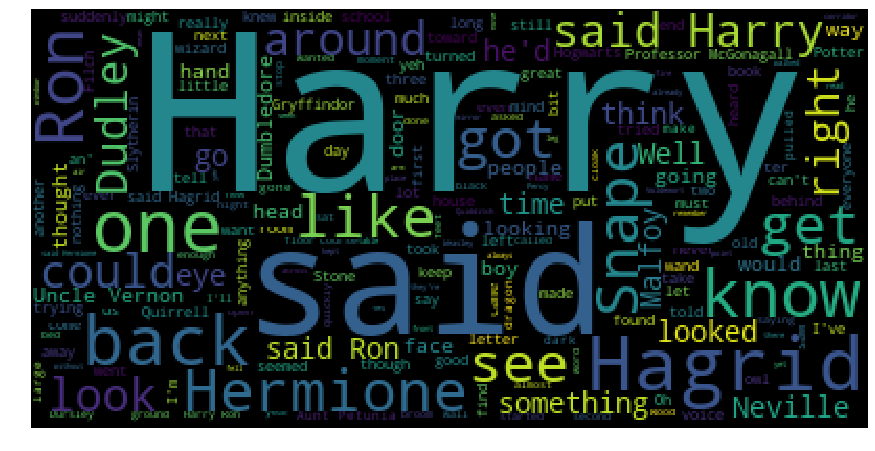

In [36]:
from wordcloud import WordCloud

# create stop words
stop_words = stopwords.words('english')

# create a word cloud
wordcloud = WordCloud(stopwords=stop_words).generate(harry_potter[0]) # input should string

# plot the word cloud for book 1
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.grid(False)
plt.imshow(wordcloud);

### Add More Stop Words

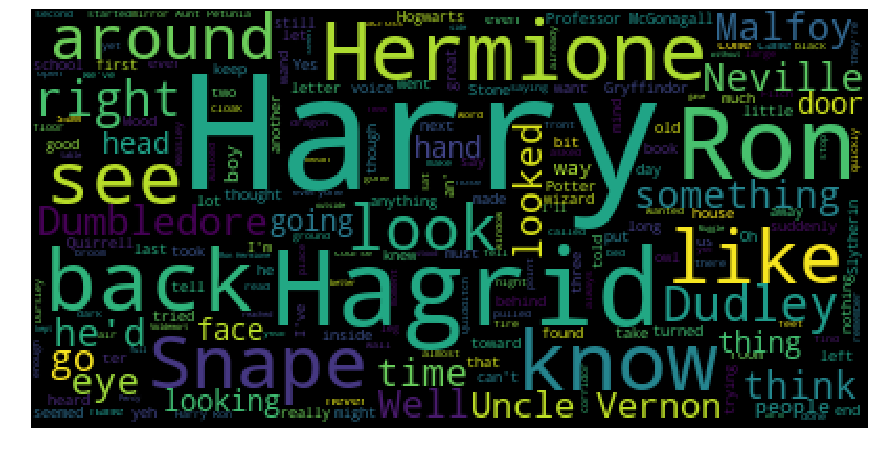

In [37]:
# add more stop words
stop_words.extend(['said', 'one', 'could', 'would', 'got', 'get'])

# create a word cloud
wordcloud = WordCloud(stopwords=stop_words).generate(harry_potter[0]) # input should string

# plot the word cloud for book 1
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.grid(False)
plt.imshow(wordcloud);

In [38]:
# The Ends!